In [ ]:
from google.colab import drive
drive.mount("1a_OG.csv")

Mounted at 1a_OG.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("/content/1a_OG.csv/MyDrive/1a_OG.csv")
df.head()


,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,Worst display quality😩😩,PHALAKSHA,1
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,Battery is good but not great as advertised.Ru...,Snehith,3
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",Back side chrome finish started like scratches...,Pro-tan International,4
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,Battery life is extraordinary. No need of carr...,sai krishna,4
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"I'm writing review after year of purchase , ev...",vicky,5


In [ ]:
df.isnull().sum()

product_id       38
product_name      0
brand             1
website           0
source_URL        0
review_title      8
review_text      44
reviewer_name     8
rating           28
dtype: int64

In [ ]:
df['review_text'] = df['review_text'].astype(str)
df.dtypes

product_id       object
product_name     object
brand            object
website          object
source_URL       object
review_title     object
review_text      object
reviewer_name    object
rating           object
dtype: object

In [ ]:
df = df.drop_duplicates(subset=['review_text'])
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,Worst display quality😩😩,PHALAKSHA,1
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,Battery is good but not great as advertised.Ru...,Snehith,3
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",Back side chrome finish started like scratches...,Pro-tan International,4
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,Battery life is extraordinary. No need of carr...,sai krishna,4
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"I'm writing review after year of purchase , ev...",vicky,5
...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,I bought it in festive season Sale..\n Itâ€™s ...,Diwakar Nayal,3
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,Pro.. Good Finish and Quality. Good Battery Li...,Sainathan Arumugam,3
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,First they sent a defective one which alwaysss...,Naveen B.,5
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,Sound is loud and somewhat clear with some ech...,shahid patel,4


In [ ]:
from textblob import Word, TextBlob

In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['review_text'].apply(pol)
df['subjectivity'] = df['review_text'].apply(sub)
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,Worst display quality😩😩,PHALAKSHA,1,-1.000000,1.000000
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,Battery is good but not great as advertised.Ru...,Snehith,3,0.333333,0.650000
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",Back side chrome finish started like scratches...,Pro-tan International,4,0.100000,0.150000
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,Battery life is extraordinary. No need of carr...,sai krishna,4,0.132500,0.622500
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"I'm writing review after year of purchase , ev...",vicky,5,0.325714,0.587857
...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,I bought it in festive season Sale..\n Itâ€™s ...,Diwakar Nayal,3,0.184667,0.614667
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,Pro.. Good Finish and Quality. Good Battery Li...,Sainathan Arumugam,3,0.217949,0.496062
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,First they sent a defective one which alwaysss...,Naveen B.,5,0.329509,0.549206
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,Sound is loud and somewhat clear with some ech...,shahid patel,4,0.200000,0.527778


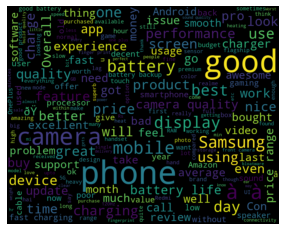

In [ ]:
from wordcloud import WordCloud
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['review_text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['polarity'].apply(getAnalysis)
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,Worst display quality😩😩,PHALAKSHA,1,-1.000000,1.000000,Negative
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,Battery is good but not great as advertised.Ru...,Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",Back side chrome finish started like scratches...,Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,Battery life is extraordinary. No need of carr...,sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"I'm writing review after year of purchase , ev...",vicky,5,0.325714,0.587857,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,I bought it in festive season Sale..\n Itâ€™s ...,Diwakar Nayal,3,0.184667,0.614667,Positive
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,Pro.. Good Finish and Quality. Good Battery Li...,Sainathan Arumugam,3,0.217949,0.496062,Positive
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,First they sent a defective one which alwaysss...,Naveen B.,5,0.329509,0.549206,Positive
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,Sound is loud and somewhat clear with some ech...,shahid patel,4,0.200000,0.527778,Positive


In [ ]:
pcomment = df[df.Class == 'Positive']
pcomment = pcomment['review_text']
round((pcomment.shape[0]/df.shape[0]*100), 1)


76.8

In [ ]:
ncomment = df[df.Class == 'Negative']
ncomment = ncomment['review_text']
round((ncomment.shape[0]/df.shape[0]*100), 1)

12.4

In [ ]:
ncomment = df[df.Class == 'Neutral']
ncomment = ncomment['review_text']
round((ncomment.shape[0]/df.shape[0]*100), 1)

10.8

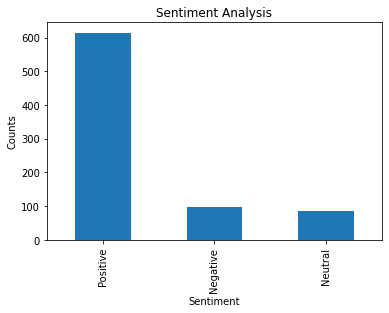

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()

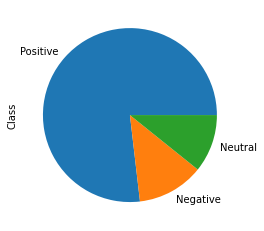

In [ ]:
df['Class'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
def data_summary(df):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.review_text) for word in t.strip().split()]
    class_label= [k for k,v in df.Class.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(df[df.Class==label].review_text) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(df[df.Class==label].review_text)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df[df.Class==label].review_text))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Documents:614
Number of Words:28454
Number of Unique Words:4930
Most Frequent Words:

is	929
the	777
and	638
for	485
i	484
to	456
a	442
it	441
good	423
this	405

Class Name :  Negative
Number of Documents:99
Number of Words:2923
Number of Unique Words:1142
Most Frequent Words:

is	92
not	70
the	50
and	50
to	46
a	39
camera	39
this	39
i	38
very	36

Class Name :  Neutral
Number of Documents:86
Number of Words:765
Number of Unique Words:421
Most Frequent Words:

the	18
for	16
in	16
is	14
i	12
this	12
mobile	12
to	11
and	11
phone	10
Total Number of Unique Words:5463


Preprocessing Steps

Upper case to Lower

In [ ]:
df['review_text']=df['review_text'].apply(lambda x: x.lower())

Removing punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['review_text']= df['review_text'].apply(lambda x:remove_punctuation(x))
# df.iloc[[31]]
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,worst display quality😩😩,PHALAKSHA,1,-1.000000,1.000000,Negative
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,battery is good but not great as advertisedrun...,Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",back side chrome finish started like scratches...,Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,battery life is extraordinary no need of carry...,sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,im writing review after year of purchase even...,vicky,5,0.325714,0.587857,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,i bought it in festive season sale\n itâ€™s wo...,Diwakar Nayal,3,0.184667,0.614667,Positive
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,pro good finish and quality good battery life ...,Sainathan Arumugam,3,0.217949,0.496062,Positive
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,first they sent a defective one which alwaysss...,Naveen B.,5,0.329509,0.549206,Positive
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,sound is loud and somewhat clear with some ech...,shahid patel,4,0.200000,0.527778,Positive


Removing URls

In [ ]:
df['review_text'] = df['review_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


<ipython-input-22-058ecff83e7d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_text'] = df['review_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


Remove Stopwords

In [ ]:
def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words]) #stopwords removal)
df['review_text'] = df['review_text'].apply(lambda x: remove_stop(x))
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,"worst,display,quality😩😩",PHALAKSHA,1,-1.000000,1.000000,Negative
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,"battery,good,great,advertisedruns,oneui,based,...",Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty","back,side,chrome,finish,started,like,scratches...",Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,"battery,life,extraordinary,need,carrying,power...",sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"im,writing,review,year,purchase,even,use,mobil...",vicky,5,0.325714,0.587857,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,"bought,festive,season,sale,itâ€™s,worth,saleâ€...",Diwakar Nayal,3,0.184667,0.614667,Positive
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,"pro,good,finish,quality,good,battery,life,good...",Sainathan Arumugam,3,0.217949,0.496062,Positive
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,"first,sent,defective,one,alwaysss,happens,sale...",Naveen B.,5,0.329509,0.549206,Positive
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,"sound,loud,somewhat,clear,echo,receiver,end,de...",shahid patel,4,0.200000,0.527778,Positive


Removing Emojis


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['review_text'] = df['review_text'].apply(lambda x: remove_emoji(x))
df.iloc[[0,1,2,3,4,6,7,5,8,9,10]]

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,"worst,display,quality",PHALAKSHA,1,-1.000000,1.000000,Negative
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,"battery,good,great,advertisedruns,oneui,based,...",Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty","back,side,chrome,finish,started,like,scratches...",Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,"battery,life,extraordinary,need,carrying,power...",sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"im,writing,review,year,purchase,even,use,mobil...",vicky,5,0.325714,0.587857,Positive
6,B089MQ622N,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)",Samsung,Amazon,https://amzn.eu/d/dN2SGFv,In Short I say I don't like this mobile,"short,say,dont,like,mobile,bcoz,trouch,pad,wor...",Bharat Premraj Jain,2,-0.058333,0.246333,Negative
7,B089MQ622N,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)",Samsung,Amazon,https://amzn.eu/d/dN2SGFv,Seems ok now,"stopped,working,3,days,return,window,closed,ch...",Lectricsuv,4,-0.125000,0.100000,Negative
5,B089MQ622N,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)",Samsung,Amazon,https://amzn.eu/d/dN2SGFv,A good phone for at this price range,"phone,doesnt,feel,slow,sluggish,decent,camera,...",srinivasan,4,-0.277778,0.577778,Negative
8,B089MQ622N,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)",Samsung,Amazon,https://amzn.eu/d/dN2SGFv,Good Budget Phone for Elders.,"samsung,galaxy,m01,core,2gb,32gb,decent,deal,r...",Abhijit Kumar Sahoo,4,0.152381,0.584524,Positive
9,B089MQ622N,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)",Samsung,Amazon,https://amzn.eu/d/dN2SGFv,Samsung Galaxy M01 Core is Worst Phone purchas...,"samsung,galaxy,m01,core,worst,phone,purchased,...",Hemant,1,-0.089048,0.542381,Negative


Tokenisation

In [ ]:
df['review_text'] = df['review_text'].astype(str)


In [ ]:
df["review_text"]=df["review_text"].apply(lambda x: TextBlob(x).words)
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,"[worst, display, quality]",PHALAKSHA,1,-1.000000,1.000000,Negative
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,"[battery, good, great, advertisedruns, oneui, ...",Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty","[back, side, chrome, finish, started, like, sc...",Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,"[battery, life, extraordinary, need, carrying,...",sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"[im, writing, review, year, purchase, even, us...",vicky,5,0.325714,0.587857,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,"[bought, festive, season, sale, itâ€™s, worth,...",Diwakar Nayal,3,0.184667,0.614667,Positive
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,"[pro, good, finish, quality, good, battery, li...",Sainathan Arumugam,3,0.217949,0.496062,Positive
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,"[first, sent, defective, one, alwaysss, happen...",Naveen B.,5,0.329509,0.549206,Positive
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,"[sound, loud, somewhat, clear, echo, receiver,...",shahid patel,4,0.200000,0.527778,Positive


Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()


In [ ]:
df['review_text'] = df['review_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,"[worst, display, quality]",PHALAKSHA,1,-1.000000,1.000000,Negative
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,"[battery, good, great, advertisedruns, oneui, ...",Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty","[back, side, chrome, finish, started, like, sc...",Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,"[battery, life, extraordinary, need, carrying,...",sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"[im, writing, review, year, purchase, even, us...",vicky,5,0.325714,0.587857,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,"[bought, festive, season, sale, itâ€™s, worth,...",Diwakar Nayal,3,0.184667,0.614667,Positive
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,"[pro, good, finish, quality, good, battery, li...",Sainathan Arumugam,3,0.217949,0.496062,Positive
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,"[first, sent, defective, one, alwaysss, happen...",Naveen B.,5,0.329509,0.549206,Positive
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,"[sound, loud, somewhat, clear, echo, receiver,...",shahid patel,4,0.200000,0.527778,Positive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# distribution of the three classes
df['Class'].value_counts()



Positive    614
Negative     99
Neutral      86
Name: Class, dtype: int64

In [ ]:
pcomment = df[df.Class == 'Positive'][:614]
pcomment

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,"[battery, good, great, advertisedruns, oneui, ...",Snehith,3,0.333333,0.650000,Positive
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty","[back, side, chrome, finish, started, like, sc...",Pro-tan International,4,0.100000,0.150000,Positive
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,"[battery, life, extraordinary, need, carrying,...",sai krishna,4,0.132500,0.622500,Positive
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"[im, writing, review, year, purchase, even, us...",vicky,5,0.325714,0.587857,Positive
8,B089MQ622N,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)",Samsung,Amazon,https://amzn.eu/d/dN2SGFv,Good Budget Phone for Elders.,"[samsung, galaxy, m01, core,2gb,32gb, decent, ...",Abhijit Kumar Sahoo,4,0.152381,0.584524,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Itâ€™s Good,"[bought, festive, season, sale, itâ€™s, worth,...",Diwakar Nayal,3,0.184667,0.614667,Positive
1679,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,NOT WORTH IT,"[pro, good, finish, quality, good, battery, li...",Sainathan Arumugam,3,0.217949,0.496062,Positive
1680,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good purchase,"[first, sent, defective, one, alwaysss, happen...",Naveen B.,5,0.329509,0.549206,Positive
1683,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Affordable earbuds,"[sound, loud, somewhat, clear, echo, receiver,...",shahid patel,4,0.200000,0.527778,Positive


In [ ]:
ncomment = df[df.Class == 'Negative']
ncomment

,0,Class,brand,polarity,product_id,product_name,rating,review_text,review_title,reviewer_name,source_URL,subjectivity,website


In [ ]:
Neucomment = df[df.Class == 'Neutral']
Neucomment

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating,polarity,subjectivity,Class
12,B07X8V5YKR,"Samsung Galaxy Note10 Lite (Aura Glow, 6GB RAM...",Samsung,Amazon,https://amzn.eu/d/gKNf1a3,For s-pen lover under 30k ....go for it,"[around, price,26k,28k, value, money, overall,...",Malik,4,0.0,0.000,Neutral
41,B078CBN95Q,"Oppo F5(Red, 6GB RAM, 64GB)",Oppo,Amazon,https://amzn.eu/d/gqR4ZaM,👎,[],Mohan,1,0.0,0.000,Neutral
59,B08444S68L,"Oppo A31(Mystery Black, 6GB RAM, 128GB)",Oppo,Amazon,https://amzn.eu/d/bTT6avn,Low refresh rate,"[manufacturer, told, refresh, rate,60hz, even,...",Ramesh,2,0.0,0.000,Neutral
65,B084455DLR,"Oppo Reno3 Pro (Midnight Black, 8GB RAM, 256GB)",Oppo,Amazon,https://amzn.eu/d/0RnCEOD,This phone is not working properly with whatsa...,"[phone, working, properly, whatsapp, especiall...",Amazon Customer,NaN,0.0,0.550,Neutral
78,B077PWBC78,"Redmi Note 9 Pro(Interstellar Black, 4GB RAM, ...",Xiaomi,Amazon,https://amzn.eu/d/icOq50r,Basic Functionality Issue,"[year, call, cant, possible, phone, call, work...",Aditya Bhuyan,2,0.0,0.825,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1419,B09WYXDNWW,"realme narzo 50A Prime (Flash Black, 4GB RAM+1...",Realme,Amazon,https://www.amazon.in/realme-Storage-Display-C...,Delivery is on time,"[delivered, timely, thisbox, screen, protectio...",T Sridhar,3,0.0,0.000,Neutral
1420,B09WYXDNWW,"realme narzo 50A Prime (Flash Black, 4GB RAM+1...",Realme,Amazon,https://www.amazon.in/realme-Storage-Display-C...,We have not received screen protector film.,"[received, screen, protector, film]",Mahesh Godase,3,0.0,0.000,Neutral
1469,B09T39K9YL,"Redmi Note 11 Pro + 5G (Stealth Black, 6GB RAM...",Xiaomi,Amazon,https://www.amazon.in/Redmi-Stealth-Additional...,Overall phone is good.,"[must, nfc, support, phone]",Prashant pandey,4,0.0,0.000,Neutral
1473,B09T39K9YL,"Redmi Note 11 Pro + 5G (Stealth Black, 6GB RAM...",Xiaomi,Amazon,https://www.amazon.in/Redmi-Stealth-Additional...,Great deal,"[though, touch, issue, software, issue, creati...",Dipsagar M.,4,0.0,0.000,Neutral


In [ ]:
df = pd.concat([pcomment,ncomment,Neucomment], axis = 0)


In [ ]:
df.Class.value_counts()

Positive    614
Neutral      86
Name: Class, dtype: int64

In [ ]:
import seaborn as sns

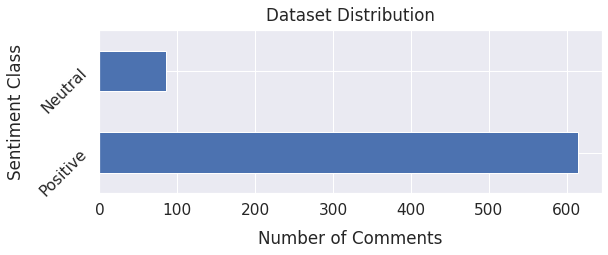

In [ ]:
sns.set(font_scale=1.4)
df['Class'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Class'] = LabelEncoder().fit_transform(df['Class'])
df['Class']

1       1
2       1
3       1
4       1
8       1
       ..
1419    0
1420    0
1469    0
1473    0
1477    0
Name: Class, Length: 786, dtype: int64

In [ ]:
df['review_text'] = df['review_text'].astype(str)
df['review_text']


1       ['battery', 'good', 'great', 'advertisedruns',...
2       ['back', 'side', 'chrome', 'finish', 'started'...
3       ['battery', 'life', 'extraordinary', 'need', '...
4       ['im', 'writing', 'review', 'year', 'purchase'...
8       ['samsung', 'galaxy', 'm01', 'core,2gb,32gb', ...
                              ...                        
1419    ['delivered', 'timely', 'thisbox', 'screen', '...
1420          ['received', 'screen', 'protector', 'film']
1469                  ['must', 'nfc', 'support', 'phone']
1473    ['though', 'touch', 'issue', 'software', 'issu...
1477                                         ['moderate']
Name: review_text, Length: 786, dtype: object

In [ ]:
x = df.review_text.values
y= df.Class.values


In [ ]:
x.shape,y.shape

((786,), (786,))

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tf_vector =  TfidfVectorizer()
tf_x = tf_vector.fit(x)
tf_x = tf_x.transform(x)

# Create a CountVectorizer
vectorizer = CountVectorizer()
vector_fit =  vectorizer.fit(x)
vector_test = vectorizer.transform(x)

In [ ]:
tf_x.shape,vector_test.shape


((786, 3333), (786, 3333))

In [ ]:
tf_x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vector_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(tf_x,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 614), (1, 614), (2, 614)]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Miscellanous libraries
from collections import Counter

Class=1, n=614 (78.117%)
Class=2, n=614 (78.117%)
Class=0, n=614 (78.117%)


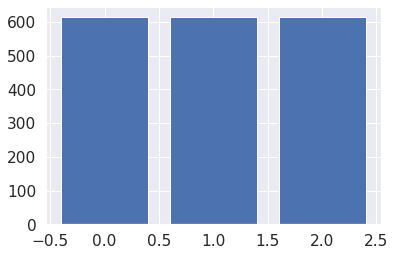

In [ ]:
counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
x_resampled.shape,y_resampled.shape

((1842, 3333), (1842,))

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_sampled, y_resampled=SMOTE().fit_resample(vector_test,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 614), (1, 614), (2, 614)]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.80, shuffle=True, random_state=95)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Model fitting
rf.fit(X_train,y_train)

#testing the model
rf.score(X_test,y_test)

0.967479674796748

In [ ]:
pred = rf.predict(X_test)

In [ ]:
comment=['Best service ever . On time, products as promised. Great quality.']
tf1_comment=vectorizer.transform(comment)
result=rf.predict(tf1_comment)
if result[0] == 1:
  print('neutral')
elif result[0]==0:
  print('negative')
else:
  print('positive')


neutral


Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support,classification_report,roc_curve

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       112
           1       1.00      0.90      0.95       123
           2       1.00      1.00      1.00       134

    accuracy                           0.97       369
   macro avg       0.97      0.97      0.97       369
weighted avg       0.97      0.97      0.97       369



In [ ]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.967479674796748


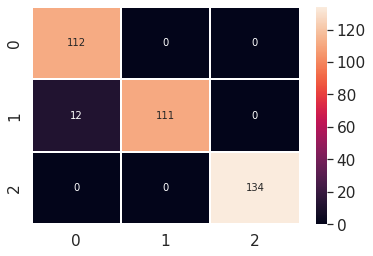

In [ ]:
conf_m=confusion_matrix(y_test,pred)
sns.heatmap(conf_m,linewidths=1,annot=True,fmt='g')

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm=SVC()

In [ ]:
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

1.0

In [ ]:
pred = model_svm.predict(X_test)

In [ ]:
comment=['this product is poor','Product is very good,fit is good','where the product is produced']
vect_comment=vectorizer.transform(comment)
model_svm.predict(vect_comment)

array([1, 1, 1])

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       134

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



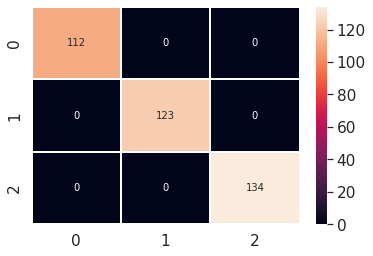

In [ ]:
conf_m=confusion_matrix(y_test,pred)
sns.heatmap(conf_m,linewidths=1,annot=True,fmt='g')

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.948509485094851

In [ ]:
pred=classifier.predict(X_test)

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       112
           1       0.97      0.87      0.92       123
           2       1.00      1.00      1.00       134

    accuracy                           0.95       369
   macro avg       0.95      0.95      0.95       369
weighted avg       0.95      0.95      0.95       369



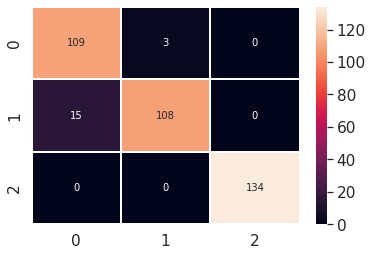

In [ ]:
conf_m=confusion_matrix(y_test,pred)
sns.heatmap(conf_m,linewidths=1,annot=True,fmt='g')

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#model fitting
model.fit(X_train,y_train)

#testing the model
model.score(X_test,y_test)

0.9728997289972899

In [ ]:
pred=model.predict(X_test)

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       112
           1       0.99      0.93      0.96       123
           2       1.00      1.00      1.00       134

    accuracy                           0.97       369
   macro avg       0.97      0.97      0.97       369
weighted avg       0.97      0.97      0.97       369



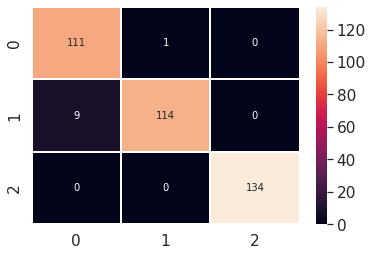

In [ ]:
conf_m=confusion_matrix(y_test,pred)
sns.heatmap(conf_m,linewidths=1,annot=True,fmt='g')

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.967479674796748

In [ ]:
pred=model.predict(X_test)

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       112
           1       0.96      0.94      0.95       123
           2       0.99      1.00      1.00       134

    accuracy                           0.97       369
   macro avg       0.97      0.97      0.97       369
weighted avg       0.97      0.97      0.97       369



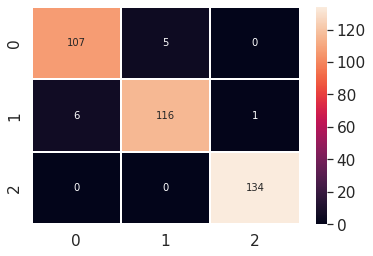

In [ ]:
conf_m=confusion_matrix(y_test,pred)
sns.heatmap(conf_m,linewidths=1,annot=True,fmt='g')

K-Nearest NeighBors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#Model fiting
knn.fit(X_train,y_train)

#testing
knn.score(X_test,y_test)

0.6964769647696477

In [ ]:
pred=knn.predict(X_test)

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       112
           1       1.00      0.09      0.16       123
           2       1.00      1.00      1.00       134

    accuracy                           0.70       369
   macro avg       0.83      0.70      0.61       369
weighted avg       0.85      0.70      0.62       369



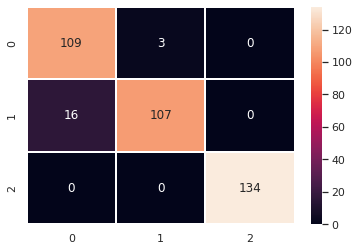

In [ ]:
conf_m=confusion_matrix(y_test,pred)
sns.heatmap(conf_m,linewidths=1,annot=True,fmt='g')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf=GradientBoostingClassifier(max_depth=3,n_estimators=10)
gbclf.fit(X_train,y_train)
gbclf.score(X_test,y_test)

0.8834688346883469

In [ ]:
# #  Define the models to compare
# model_pipeline=[]
# model_pipeline.append(MultinomialNB())
# model_pipeline.append(LogisticRegression(solver='liblinear'))
# model_pipeline.append(SVC())
# model_pipeline.append(RandomForestClassifier())
# model_pipeline.append(DecisionTreeClassifier())
# model_pipeline.append(KNeighborsClassifier())

In [ ]:
# from sklearn import metrics
# from sklearn.metrics import classification_report



# model_list=['Naive Bayes','Logistic Regression','SVM','Random Forest','Decision Tree','KNN']
# acc_list=[]
# cm_list=[]

# for model in model_pipeline:
#   model.fit(X_train,y_train)
#   y_pred=model.predict(X_test)
#   acc_list.append(metrics.accuracy_score(y_test,y_pred))
#   # fprate,tprate, thresholds=metrics.roc_curve(y_test,y_pred,pos_label=1)
#   # auc_list.append(round(metrics.auc(fprate,tprate),2))
#   cm_list.append(confusion_matrix(y_test,y_pred))



In [ ]:
# result_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
# result_df

In [ ]:
names=['KNN','SVM','Decision Tree','Naive Bayes','Logistic Regression','Gradient Boosting','Random Forest']

classifiers=[
    KNeighborsClassifier(3),
    SVC(),
    DecisionTreeClassifier(max_depth=5),
    MultinomialNB(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    RandomForestClassifier(max_depth=5,n_estimators=100)]

In [ ]:
scores=[]
for name,clf in zip(names,classifiers):
  clf.fit(X_train,y_train)
  score=clf.score(X_test,y_test)
  scores.append(score)

In [ ]:
scores

[0.7073170731707317,
 1.0,
 0.8834688346883469,
 0.967479674796748,
 0.9728997289972899,
 0.9186991869918699,
 0.975609756097561]

In [ ]:
df=pd.DataFrame()
df['name']=names
df['score']=scores
df

,name,score
0,KNN,0.707317
1,SVM,1.000000
2,Decision Tree,0.883469
3,Naive Bayes,0.967480
4,Logistic Regression,0.972900
5,Gradient Boosting,0.918699
6,Random Forest,0.975610


In [ ]:
cm=sns.light_palette("green",as_cmap=True)
s=df.style.background_gradient(cmap=cm)
s


,name,score
0,KNN,0.707317
1,SVM,1.000000
2,Decision Tree,0.883469
3,Naive Bayes,0.967480
4,Logistic Regression,0.972900
5,Gradient Boosting,0.918699
6,Random Forest,0.975610


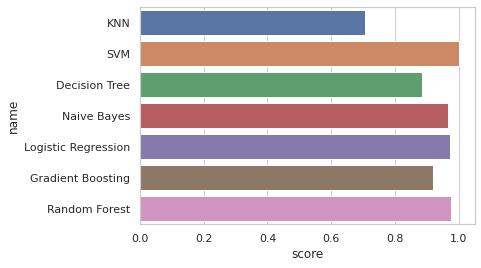

In [ ]:
sns.set(style="whitegrid").
ax=sns.barplot(y="name",x="score",data=df)